In [48]:
import pandas as pd
import os
import csv
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [69]:
current_path =os.path.expanduser('~')
current_path =os.path.join(current_path,'Final_Exam')
input_path = os.path.join(current_path,'Data')
output_path = os.path.join(current_path,'Analysis')
output_path = os.path.join(output_path,'Analysis_3')

In [50]:
df_ratings = pd.read_csv( input_path + '\\ratings.csv', encoding='ISO-8859-1')
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [51]:
df_users = pd.read_csv( input_path + '\\users.csv', encoding='ISO-8859-1')
df_users.head()

,userId,Age,Gender,Occupation,Zip Code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [52]:
df_user_ratings = pd.merge(df_ratings, df_users, on = 'userId')
df_user_ratings.head()

,userId,movieId,rating,timestamp,Age,Gender,Occupation,Zip Code
0,1,2,3.5,1112486027,24,M,technician,85711
1,1,29,3.5,1112484676,24,M,technician,85711
2,1,32,3.5,1112484819,24,M,technician,85711
3,1,47,3.5,1112484727,24,M,technician,85711
4,1,50,3.5,1112484580,24,M,technician,85711


In [53]:
df_genres = pd.read_csv( input_path + '\\movie_genres.csv', encoding='ISO-8859-1')
df_genres.head()

,movieId,genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


# binning the users

In [54]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df_user_ratings['age_group'] = pd.cut(df_user_ratings.Age, range(0, 81, 10), right=False, labels=labels)
df_user_ratings[['Age', 'age_group']].drop_duplicates()[:10]

,Age,age_group
0,24,20-29
175,53,50-59
236,23,20-29
451,33,30-39
517,42,40-49
541,57,50-59
817,36,30-39
887,29,20-29
960,39,30-39
1464,28,20-29


In [55]:
df_user_ratings.head()

,userId,movieId,rating,timestamp,Age,Gender,Occupation,Zip Code,age_group
0,1,2,3.5,1112486027,24,M,technician,85711,20-29
1,1,29,3.5,1112484676,24,M,technician,85711,20-29
2,1,32,3.5,1112484819,24,M,technician,85711,20-29
3,1,47,3.5,1112484727,24,M,technician,85711,20-29
4,1,50,3.5,1112484580,24,M,technician,85711,20-29


In [56]:
df_mov_user_gen = pd.merge(df_user_ratings,df_genres, on='movieId')
#df_mov_user_gen.shape
df_mov_user_gen.head()

,userId,movieId,rating,timestamp,Age,Gender,Occupation,Zip Code,age_group,genre
0,1,2,3.5,1112486027,24,M,technician,85711,20-29,Adventure
1,1,2,3.5,1112486027,24,M,technician,85711,20-29,Children
2,1,2,3.5,1112486027,24,M,technician,85711,20-29,Fantasy
3,5,2,3.0,851527569,33,F,other,15213,30-39,Adventure
4,5,2,3.0,851527569,33,F,other,15213,30-39,Children


In [57]:
df_output = df_mov_user_gen[['age_group','genre','userId']]
df_output.head()

,age_group,genre,userId
0,20-29,Adventure,1
1,20-29,Children,1
2,20-29,Fantasy,1
3,30-39,Adventure,5
4,30-39,Children,5


In [58]:
df_output = df_output.groupby(['age_group','genre']).count()
df_output.head()

userId
age_group genre            
0-9       Action         16
          Adventure       4
          Animation       2
          Children        2
          Comedy          9

In [59]:
g = df_output['userId'].groupby(level=0, group_keys=False) # group by the first level of index
#res = g.apply(lambda x: x.order(ascending=False)) # sort within each group in descending order 
res = g.apply(lambda x: x.sort_values(ascending=False))
res = pd.DataFrame(res) #convert series to dataframe 
res.head()

userId
age_group genre         
0-9       Action      16
          Sci-Fi      11
          Drama        9
          Crime        9
          Comedy       9

In [60]:
res = res.reset_index()
res = res.groupby(['age_group']).first()
res = res.rename(columns={'userId':'Total Users'})
res = res.reset_index()
res

,age_group,genre,Total Users
0,0-9,Action,16
1,10-19,Drama,5489
2,20-29,Drama,21287
3,30-39,Drama,13487
4,40-49,Drama,9442
5,50-59,Drama,5969
6,60-69,Drama,1588
7,70-79,Comedy,134


In [61]:
genre = res['genre']

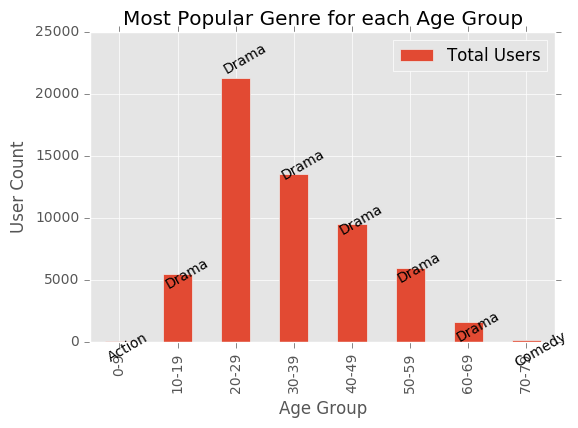

In [67]:
ax = res.plot.bar(x='age_group', y=['Total Users'] , title='Most Popular Genre for each Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('User Count')
i = 0
for p in ax.patches:
    height = p.get_height()
    ax.annotate(genre[i] , xy=((p.get_x()), (p.get_height()*1.1)), rotation=30)
    i = i +1


plt.savefig(output_path + '\\age_group_genre.jpeg')
plt.show()

# How different gender rates genres

In [63]:
df_genre_gender = df_mov_user_gen.pivot_table(index=['genre'],
                           columns=['Gender'],
                           values='rating',
                           fill_value=0)
df_genre_gender.head()

Gender,F,M
genre,,
Action,3.455842,3.406741
Adventure,3.521127,3.478885
Animation,3.579461,3.549121
Children,3.388015,3.353084
Comedy,3.406159,3.389409


In [64]:
df_genre_gender = df_genre_gender.reset_index()

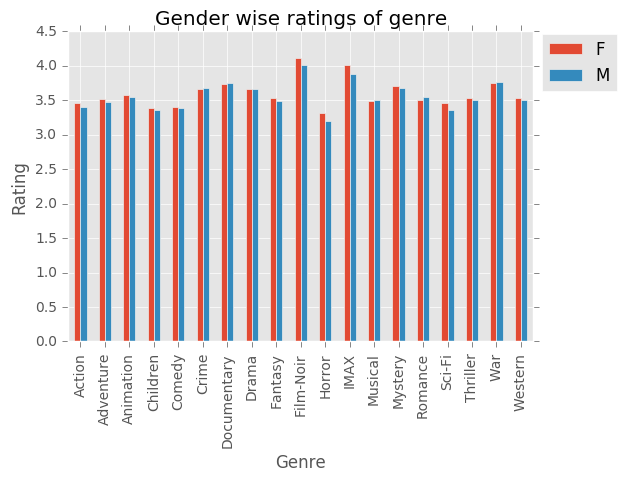

In [68]:
ax1 = df_genre_gender.plot.bar(x='genre', y=['F', 'M'] , title='Gender wise ratings of genre', legend='centre left')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Rating')
plt.legend(loc=10, bbox_to_anchor=(1.1, .9), ncol=1)
plt.savefig(output_path + '\\gender_rating_genre.jpeg')
plt.show(output_path + '\\related_movies.jpeg)